[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


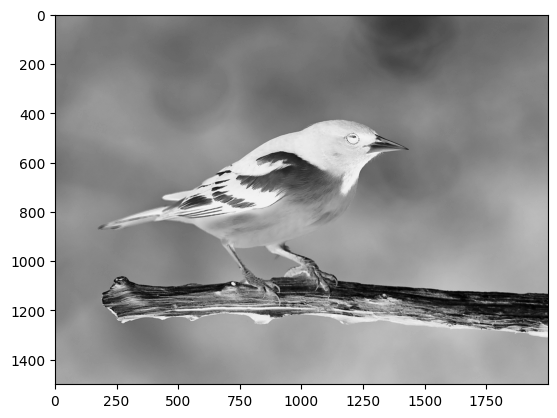

In [14]:
#1.1
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)
print(im_2)

img.show()

plt.imshow(new_img, cmap='gray')
plt.show()

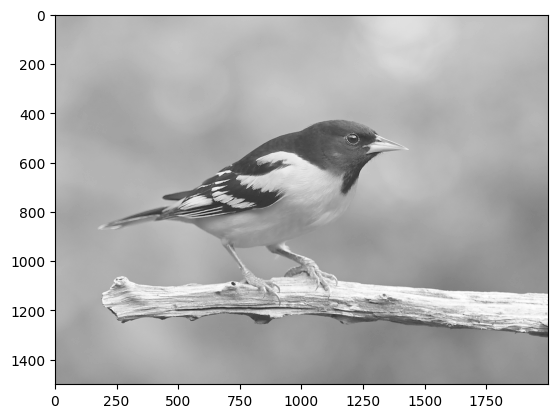

In [20]:
#1.2
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

gamma = 0.5

b1 = im_1.astype(float)

max_val_b1 = np.max(b1)
if max_val_b1 == 0:
    max_val_b1 = 1 

b3 = b1 / max_val_b1

epsilon = 1e-10
b3[b3 == 0] = epsilon

b2 = np.log(b3) * gamma

c = np.exp(b2) * 255.0


c = np.clip(c, 0, 255)

c1 = c.astype(np.uint8) 

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()

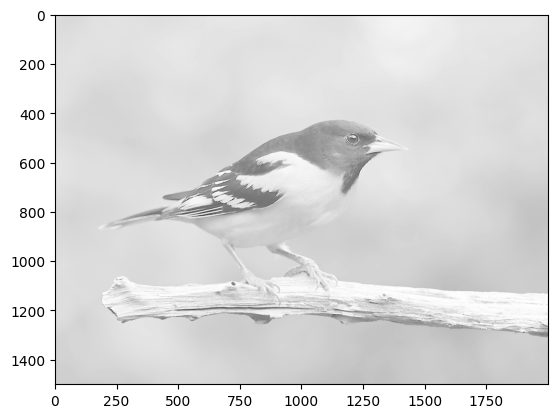

In [9]:
#1.3
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L') 

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#convert ndarray from int to float
b1 = im_1.astype(float)

#find maximum value in b1
b2 = np.max(b1)

if b2 == 0:
    b2 = 1.0 

#performing the log transformation
epsilon = 1e-10
b1_safe = b1 + epsilon

c = (128.0 * np.log(1 + b1_safe)) / np.log(1 + b2)

# Clip values to ensure they are within the valid range [0, 255]
c_clipped = np.clip(c, 0, 255)

#c1 is converted to type uint8 (unsigned 8-bit integer)
c1 = c_clipped.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray') 
plt.show()

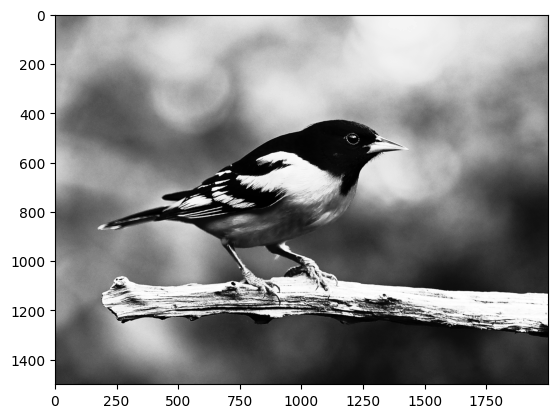

In [16]:
#1.4
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im1 = np.asarray(img)

#convert 2D ndarray to 1D array
im1_flat = im1.flatten() 

#histogram and bin are computed
hist, bins = np.histogram(im1_flat, 256, [0, 255])

#cumulative distribution function is computed
cdf = hist.cumsum()

#places where cdf=0 is masked or ignored and
#rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)
if cdf_m.mask.all():
    cdf_m = cdf

#histogram equalization is performed
min_cdf = cdf_m.min()
max_cdf = cdf_m.max()

if (max_cdf - min_cdf) == 0:
    c_equalized = im1_flat.astype(np.uint8)
else:
    num_cdf_m = (cdf_m - min_cdf) * 255
    den_cdf_m = (max_cdf - min_cdf)
    cdf_equalized = num_cdf_m / den_cdf_m

    #the masked places in cdf_m are now 0
    c1 = cdf_equalized.filled(0).astype(np.uint8) 
    c1 = np.clip(c1, 0, 255)
    c_equalized = c1

#cdf values are assigned in the flattened array
im2 = c_equalized[im1_flat]

#im2 is 1D so we use reshape command to
#make it into 2D
im3 = np.reshape(im2, im1.shape)

#converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()

255 0


C:\Users\PC\AppData\Local\Temp\ipykernel_5156\664867469.py:23: RuntimeWarning: overflow encountered in scalar subtract
  im2 = 255 * (c - a) / (b - a) #


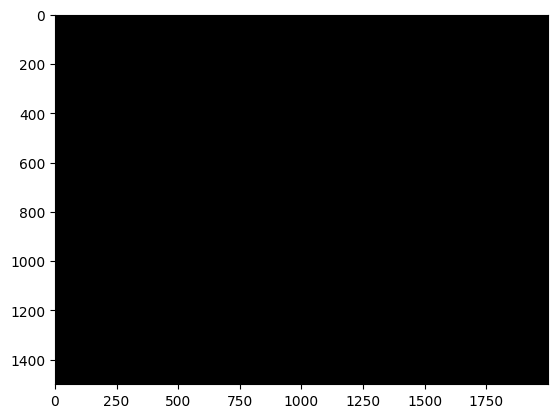

In [18]:
#1.5
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L') #
#convert image 1 into an ndarray
im1 = np.asarray(img) #

# finding the maximum and minimum pixel values
a = im1.max() #
b = im1.min() #
print(a, b) #

# converting im1 to float
c = im1.astype(float) #

# contrast stretching transformation
im2 = 255 * (c - a) / (b - a) #

#im2 is converted from ndarray to image
im3 = Image.fromarray(im2) #

img.show() #
im3.show() #
plt.imshow(im3) #
plt.show() #

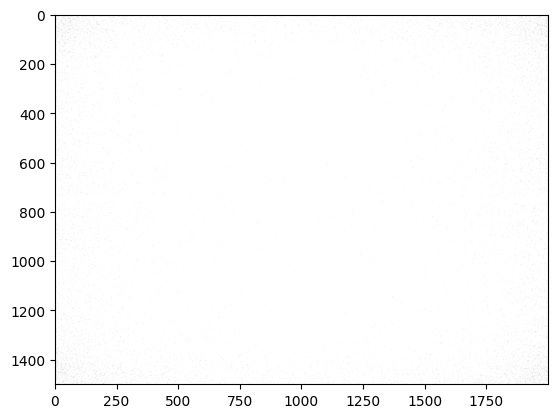

In [19]:
#1.6.1
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray (img)
# performing FFT
c = abs (scipy.fftpack.fft2 (iml))
# shifting the Fourier frequency image
d= scipy.fftpack.fftshift (c)
d = d.astype (float)
#im2 is converted from ndarray to image
im3 = Image.fromarray (d)
img.show ()
im3.show()
plt.imshow (im3)

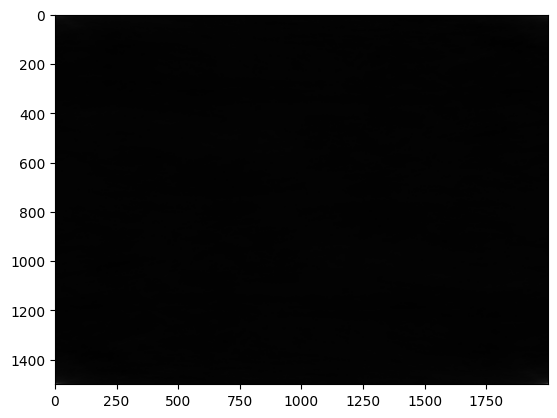

In [25]:
#1.6.2
#Butterworth Lowpass Filter
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into
iml = np.asarray(img)
# performing FFT
c = abs (scipy.fftpack.fft2 (iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift (c)
#intializing variables for convolution function
M = d.shape [0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H= np.ones((M, N))
centerl = M/2
center2 = N/2
d_0= 30.0 #cut-off radius
tl = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * tl
# defining the convolution function for BLPF
for i in range(1, M):
    for j in range (1, N) :
        rl = (i - centerl) **2 + ( - center2) **2
        # euclidean distance from origin is computed
        r = math.sqrt (rl)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**tl)
#H is converted from ndarray to image
H = H.astype (float)
H = Image.fromarray (H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs (scipy.fftpack.ifft2 (con))
#e is converted from ndarray to image
e = e.astype (float)
im3 = Image.fromarray (e)
img.show ()
im3.show ()
plt.imshow(im3)
plt.show ()

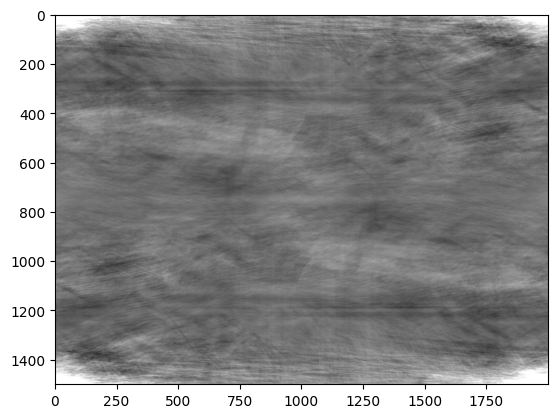

In [26]:
#1.6.2
#Butterworth highpass Filter
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
#performing FFT
c= abs (scipy.fftpack.fft2(iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
#intializing variables for convolution function
M = d.shape [0]
N = d.shape [1]
#His defined and values in H are initialized to 1
H= np.ones((M, N))
centerl = M/2
center2 = N/2
d_0 = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * tl
#defining the convolution function for BLPF
for i in range (1, M):
    for j in range (1, N) :
        rl = (i- centerl) **2 + (j - center2) **2
        # euclidean distance from origin is computed
        r = math.sqrt (rl)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, 3] = 1/(1 + (r/d_0) **t2)
#H is converted from ndarray to image
H= H.astype (float)
H = Image.fromarray(H)
# performing the convolution
con =d * H
# computing the magnitude of the inverse FFT
e = abs (scipy.fftpack.ifft2(con))
#e is converted from ndarray to image
e = e.astype (float)
im3 = Image.fromarray (e)
img.show ()
im3.show ()
plt.imshow(im3)
plt.show ()


Dropdown(description='Phương pháp:', options=('Image Inverse', 'Gamma Correction', 'Log Transformation', 'Hist…

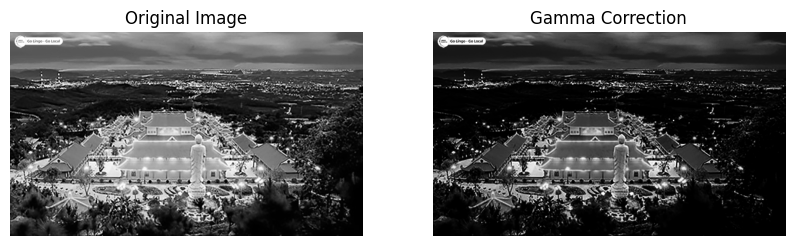

C:\Users\PC\AppData\Local\Temp\ipykernel_16168\1173751922.py:23: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\PC\AppData\Local\Temp\ipykernel_16168\1173751922.py:23: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
C:\Users\PC\AppData\Local\Temp\ipykernel_16168\1173751922.py:24: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(img + 1))
C:\Users\PC\AppData\Local\Temp\ipykernel_16168\1173751922.py:24: RuntimeWarning: invalid value encountered in multiply
  log_img = c * (np.log(img + 1))
C:\Users\PC\AppData\Local\Temp\ipykernel_16168\1173751922.py:25: RuntimeWarning: invalid value encountered in cast
  return np.uint8(log_img)


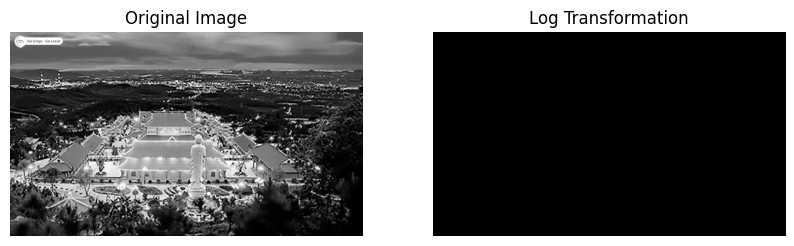

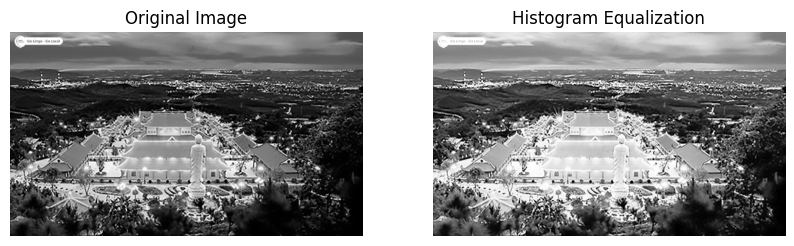

In [1]:
# 1. Import các thư viện cần thiết
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from IPython.display import display

# 2. Đường dẫn và đọc ảnh grayscale
img_path = os.path.join("exercise", "pagoda.jpg")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 3. Các hàm biến đổi ảnh
def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    normalized = img / 255.0
    corrected = np.power(normalized, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * (np.log(img + 1))
    return np.uint8(log_img)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = ((img - a) / (b - a)) * 255
    return np.uint8(stretched)

# 4. Hàm hiển thị ảnh gốc và ảnh đã biến đổi
def show_result(transformed_img, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title(title)
    plt.imshow(transformed_img, cmap='gray')
    plt.axis('off')
    
    # Lưu kết quả
    save_path = os.path.join("exercise", f"{title.lower().replace(' ', '_')}_pagoda.jpg")
    cv2.imwrite(save_path, transformed_img)
    
    plt.show()

# 5. Widget menu chọn phương pháp
methods = {
    "Image Inverse": image_inverse,
    "Gamma Correction": gamma_correction,
    "Log Transformation": log_transform,
    "Histogram Equalization": histogram_equalization,
    "Contrast Stretching": contrast_stretching
}

dropdown = widgets.Dropdown(
    options=list(methods.keys()),
    description='Phương pháp:',
    style={'description_width': 'initial'}
)

# 6. Hàm xử lý khi người dùng chọn từ menu
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        method_name = change['new']
        if method_name == "Gamma Correction":
            result = methods[method_name](img, gamma=2.2)  # Dùng gamma mặc định
        else:
            result = methods[method_name](img)
        show_result(result, method_name)

# 7. Gán sự kiện
dropdown.observe(on_change)

# 8. Hiển thị widget
display(dropdown)


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier Transform
L - Butterworth Low-pass Filter
H - Butterworth High-pass Filter


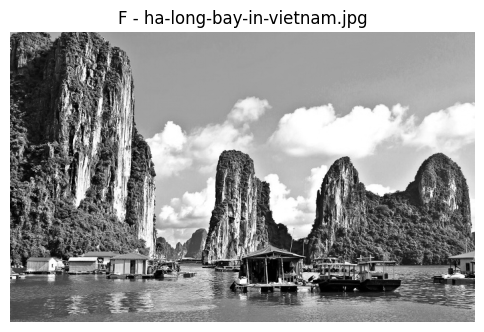

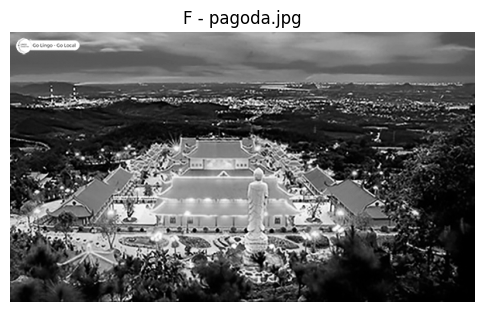

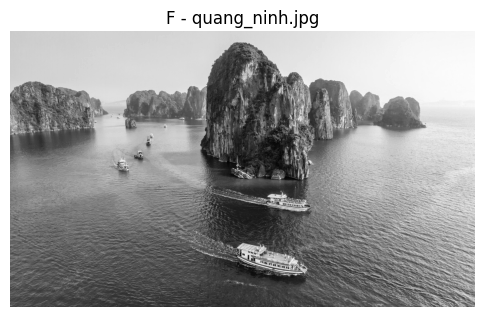

✅ Đã lưu ảnh kết quả vào thư mục: output_fft


In [2]:
# Bài 2 

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Tạo thư mục lưu kết quả
output_dir = "output_fft"
os.makedirs(output_dir, exist_ok=True)

# Danh sách ảnh trong thư mục 'exercise'
image_folder = "exercise"
image_names = [
    "ha-long-bay-in-vietnam.jpg",
    "pagoda.jpg",
    "quang_ninh.jpg"
]

# Hàm hiển thị ảnh
def show_image(img, title=""):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Hàm thực hiện FFT và các bộ lọc Butterworth
def apply_fft_filter(img, filter_type='F', D0=30, n=2):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2

    # Tạo mặt nạ Butterworth
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)

    if filter_type == 'L':  # Low-pass
        H = 1 / (1 + (D / D0)**(2 * n))
    elif filter_type == 'H':  # High-pass
        H = 1 / (1 + (D0 / D)**(2 * n))
    else:  # FFT magnitude
        H = np.ones_like(D)

    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))

    return img_back

# Menu lựa chọn
print("Chọn phương pháp biến đổi ảnh:")
print("F - Fast Fourier Transform")
print("L - Butterworth Low-pass Filter")
print("H - Butterworth High-pass Filter")
choice = input("Nhập lựa chọn (F/L/H): ").strip().upper()

# Xử lý ảnh theo lựa chọn
for name in image_names:
    path = os.path.join(image_folder, name)
    img = cv2.imread(path)
    result = apply_fft_filter(img, filter_type=choice)

    save_name = f"{choice}_{name}"
    save_path = os.path.join(output_dir, save_name)
    cv2.imwrite(save_path, result)

    show_image(result, title=f"{choice} - {name}")

print(f"✅ Đã lưu ảnh kết quả vào thư mục: {output_dir}")

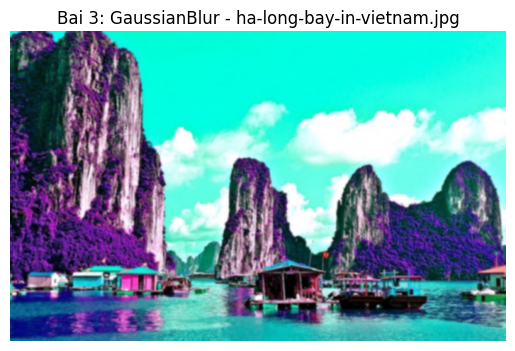

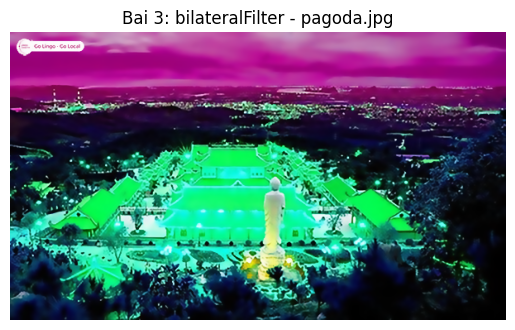

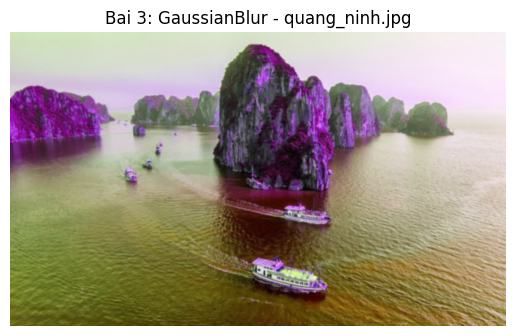

✅Đã lưu ảnh vào output_bai3


In [3]:
# Bài 3

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random

# Tạo thư mục kết quả
output_dir = "output_bai3"
os.makedirs(output_dir, exist_ok=True)

image_folder = "exercise"
image_names = [
    "ha-long-bay-in-vietnam.jpg",
    "pagoda.jpg",
    "quang_ninh.jpg"
]

# Biến đổi trong câu 1
transform_c1 = [cv2.medianBlur, cv2.GaussianBlur, cv2.bilateralFilter]

def shuffle_rgb(img):
    channels = cv2.split(img)
    order = np.random.permutation(3)
    return cv2.merge([channels[i] for i in order])

for name in image_names:
    img = cv2.imread(os.path.join(image_folder, name))
    shuffled = shuffle_rgb(img)
    method = random.choice(transform_c1)

    if method == cv2.medianBlur:
        result = method(shuffled, 5)
    elif method == cv2.GaussianBlur:
        result = method(shuffled, (5, 5), 0)
    else:
        result = method(shuffled, 9, 75, 75)

    save_path = os.path.join(output_dir, f"bai3_{method.__name__}_{name}")
    cv2.imwrite(save_path, result)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"Bai 3: {method.__name__} - {name}")
    plt.axis('off')
    plt.show()

print("\u2705Đã lưu ảnh vào output_bai3")

C:\Users\PC\AppData\Local\Temp\ipykernel_16168\2173539019.py:38: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2 * n))


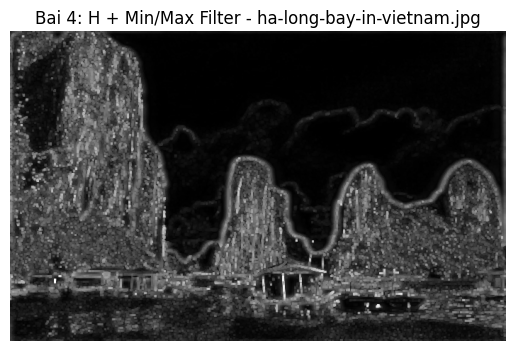

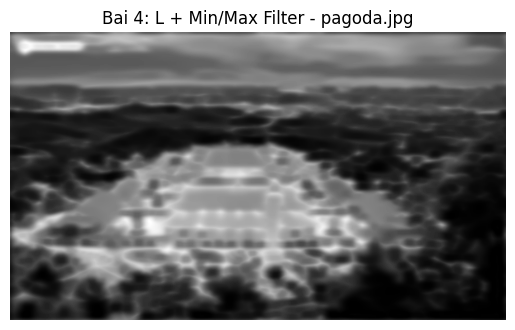

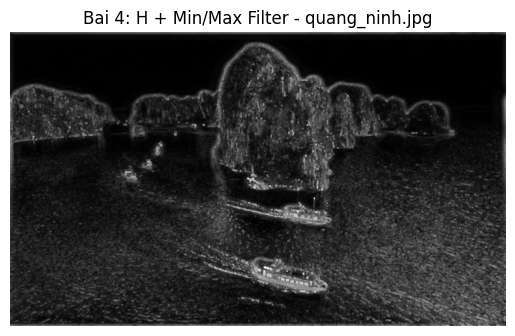

✅Đã lưu ảnh vào output_bai4


In [4]:
# Bài 4

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from scipy.ndimage import minimum_filter, maximum_filter

output_dir = "output_bai4"
os.makedirs(output_dir, exist_ok=True)

image_folder = "exercise"
image_names = [
    "ha-long-bay-in-vietnam.jpg",
    "pagoda.jpg",
    "quang_ninh.jpg"
]

def shuffle_rgb(img):
    channels = cv2.split(img)
    order = np.random.permutation(3)
    return cv2.merge([channels[i] for i in order])

def apply_fft_filter(img_gray, filter_type='F', D0=30, n=2):
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)

    if filter_type == 'L':
        H = 1 / (1 + (D / D0)**(2 * n))
    elif filter_type == 'H':
        H = 1 / (1 + (D0 / D)**(2 * n))
    else:
        H = np.ones_like(D)

    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return np.uint8(np.clip(img_back, 0, 255))

for name in image_names:
    img = cv2.imread(os.path.join(image_folder, name))
    shuffled = shuffle_rgb(img)
    gray = cv2.cvtColor(shuffled, cv2.COLOR_BGR2GRAY)

    filter_type = random.choice(['L', 'H'])
    fft_result = apply_fft_filter(gray, filter_type=filter_type)

    if filter_type == 'L':
        final = minimum_filter(fft_result, size=3)
    elif filter_type == 'H':
        final = maximum_filter(fft_result, size=3)
    else:
        final = fft_result

    save_path = os.path.join(output_dir, f"bai4_{filter_type}_{name}")
    cv2.imwrite(save_path, final)
    plt.imshow(final, cmap='gray')
    plt.title(f"Bai 4: {filter_type} + Min/Max Filter - {name}")
    plt.axis('off')
    plt.show()

print("\u2705Đã lưu ảnh vào output_bai4")
